## Key Takeaways

- ROC curves evaluate ranking ability across thresholds.
- AUC has a clear probabilistic interpretation but ignores decision costs.
- Precision–Recall curves focus on positive-class performance.
- For imbalanced problems, PR curves often provide more actionable insight.
- Evaluation metrics are not neutral; they encode assumptions and priorities.


## Problem Context

MNIST is a 10-class classification problem where each input image
represents a handwritten digit from 0 to 9.

Multiclass accuracy alone does not reveal which digits are confused
with each other. To understand model behavior, we must analyze errors
at the class level.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

## Training a Multiclass Classifier

We use a linear classifier trained with stochastic gradient descent.
The classifier uses a One-vs-Rest strategy internally to handle
multiclass classification.


In [3]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

y_train_pred = sgd_clf.predict(X_train)

## Multiclass Confusion Matrix

A multiclass confusion matrix shows how often each true class is
predicted as every other class.

Rows correspond to true labels.
Columns correspond to predicted labels.


In [4]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5363,    0,   40,  131,    6,   98,   16,    7,  261,    1],
       [   1, 5921,   22,  198,    4,   14,   14,   42,  515,   11],
       [   5,   12, 4925,  297,   37,   32,   32,   48,  553,   17],
       [   3,    2,   65, 5639,    3,  120,    5,   19,  225,   50],
       [  14,    4,   32,   82, 4651,   51,   18,   40,  366,  584],
       [  17,    6,   31,  419,   32, 4319,   72,   31,  429,   65],
       [  15,    1,   61,   44,   25,   91, 5391,    3,  283,    4],
       [   3,    0,   49,  101,   22,   19,    2, 5674,  125,  270],
       [  13,    7,   28,  226,    6,  216,   15,   12, 5274,   54],
       [  10,    1,   20,  211,   46,   50,    0,  163,  263, 5185]])

### Why Raw Confusion Matrices Can Be Misleading

Some digits appear more frequently than others.
As a result, raw counts can exaggerate errors for common classes
and hide errors for rare classes.

To better understand model behavior, we normalize the confusion matrix.


In [5]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums


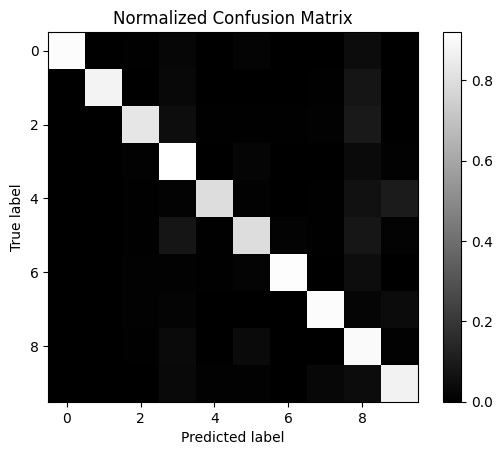

In [6]:
plt.imshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.title("Normalized Confusion Matrix")
plt.show()


## Interpreting the Normalized Confusion Matrix

- Bright diagonal cells indicate correct classifications.
- Off-diagonal cells indicate systematic confusions.
- Each row shows how samples of a given true class are distributed
  across predicted classes.

This visualization reveals which digits are most often confused.


## Error-Focused Confusion Matrix

To focus exclusively on mistakes, we remove the diagonal elements
(corresponding to correct predictions).


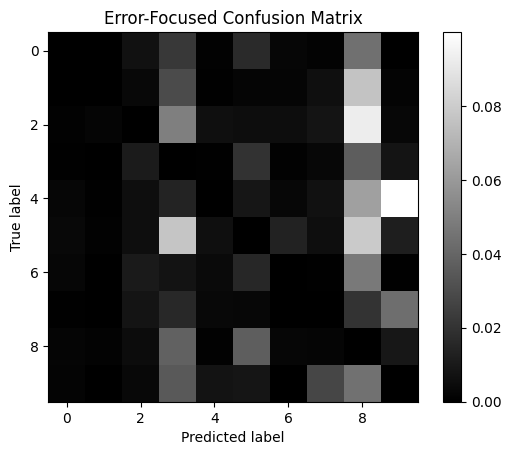

In [7]:
np.fill_diagonal(norm_conf_mx, 0)

plt.imshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.title("Error-Focused Confusion Matrix")
plt.show()


## Interpretation

The error-focused confusion matrix highlights systematic failure modes.
Strong off-diagonal patterns indicate that the model consistently
confuses certain digit pairs, such as:
- 3 vs 5
- 4 vs 9
- 8 vs 9

These errors are not random and suggest limitations in the feature
representation and model capacity.


## Implications for Model Improvement

The observed confusions suggest that:
- Linear decision boundaries are insufficient for some digit pairs
- The model lacks invariance to stroke thickness, rotation, and shape

Potential improvements include:
- Feature engineering or data augmentation
- More expressive models (e.g., convolutional neural networks)
- Specialized handling of frequently confused class pairs


## Implications for Model Improvement

The observed confusions suggest that:
- Linear decision boundaries are insufficient for some digit pairs
- The model lacks invariance to stroke thickness, rotation, and shape

Potential improvements include:
- Feature engineering or data augmentation
- More expressive models (e.g., convolutional neural networks)
- Specialized handling of frequently confused class pairs
